# Report 1


### library importation, constant definition and data loading from files

The next cell defines the imports nedeed to execute the notebook

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 5)
from functools import reduce
import os
from operator import truediv
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pareto
from hv import HyperVolume
pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.3f}'.format



Populating the interactive namespace from numpy and matplotlib


The next cell defines the contanst used by the procedures bellow


In [2]:
report1_dir = '../dras-controller/paretos/'
output_tex = '../dras-controller/output_tex/'

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    #print(x.to_latex(index=False)) 
    pd.reset_option('display.max_rows')

# plot client function

the scenarios are generated from swf files



procesar pareto

In [19]:

def plotUpperLvl(pattern1):    
    data = pd.DataFrame()
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f)]:
        data1 = pd.read_csv(report1_dir +'/' +filename, header=None,sep='\t',skiprows=0,)
        #display(data)

        data1.columns = ['x','y']
        #data.x = data.x*-1
        data1.y = data1.y*-1

        data1 = data1.round(4)
        #data = pd.append(data,data1)
        data = data.append(data1) 
        #ax.scatter(data['x'], data['y'], label=filename,marker=mark,color=color)

        
    return data 


In [20]:
def hv(data):
    
    
    Row_list =[] 
    for index, rows in data.iterrows(): 
        my_list =[rows.x, rows.y]
        Row_list.append(my_list) 
#-max(cost),min(reduction)
    front = Row_list
    #print(data.x.max(), data.y.max())
    referencePoint = [data.x.max(), data.y.max()]
    hv = HyperVolume(referencePoint)
    volume = hv.compute(front)
    return volume

42645.3
10669.5
DRD-5-0-0-HM-1
                       n    hv
0   pHPFd-DRD-6-2-2-HT-1 0.687
1   pHPFg-DRD-6-2-2-HT-1 0.497
2   pLLFd-DRD-6-2-2-HT-1 0.023
3   pLLFg-DRD-6-2-2-HT-1 0.004
4   pHDFd-DRD-6-2-2-HT-1 0.019
5   pHDFg-DRD-6-2-2-HT-1 0.003
6   pHPFd-DRD-5-0-0-HM-1 0.600
7   pHPFg-DRD-5-0-0-HM-1 0.355
8   pLLFd-DRD-5-0-0-HM-1 0.032
9   pLLFg-DRD-5-0-0-HM-1 0.001
10  pHDFd-DRD-5-0-0-HM-1 0.040
11  pHDFg-DRD-5-0-0-HM-1 0.002


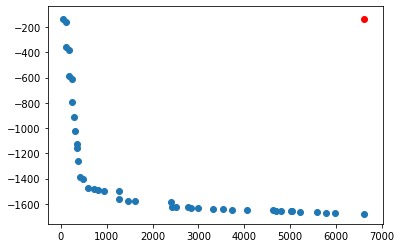

In [22]:
n = ['pHPFd-DRD-6-2-2-HT-1',
     'pHPFg-DRD-6-2-2-HT-1',
     'pLLFd-DRD-6-2-2-HT-1',
     'pLLFg-DRD-6-2-2-HT-1',
     'pHDFd-DRD-6-2-2-HT-1',
     'pHDFg-DRD-6-2-2-HT-1',
     'pHPFd-DRD-5-0-0-HM-1',
     'pHPFg-DRD-5-0-0-HM-1',
     'pLLFd-DRD-5-0-0-HM-1',
     'pLLFg-DRD-5-0-0-HM-1',
     'pHDFd-DRD-5-0-0-HM-1',
     'pHDFg-DRD-5-0-0-HM-1',
    ]
print( plotUpperLvl(n[0]).x.max())
print( plotUpperLvl(n[6][6:]).x.max())
print(n[6][6:])

hvs = pd.DataFrame(n, columns =['n']) 
hvs['hv'] = hvs.apply(lambda e: -1*hv( plotUpperLvl(e.n))
                                  /(plotUpperLvl(e.n[6:]).x.max()*plotUpperLvl(e.n[6:]).y.min())
                      ,axis = 1)
print(hvs)

data = plotUpperLvl('pLLFd-DRD-6-2-2-HT-1')
#hvs['v'] = hv(

fig, ax = plt.subplots()
ax.scatter(data['x'], data['y'])
ax.scatter(data['x'].max(), data['y'].max(),color='r')

#display(data)

#'pHPFg-DRD-6-2-2-HT-1',hv(plotUpperLvl("pHPFd-DRD-6-2-2-HT-1")).round(1)
#'pLLFd-DRD-6-2-2-HT-1',hv(plotUpperLvl("pHPFd-DRD-6-2-2-HT-1")).round(1)
#'pLLFg-DRD-6-2-2-HT-1',hv(plotUpperLvl("pHPFd-DRD-6-2-2-HT-1")).round(1)
#'pHDFd-DRD-6-2-2-HT-1',hv(plotUpperLvl("pHPFd-DRD-6-2-2-HT-1")).round(1)
#'pHDFg-DRD-6-2-2-HT-1',hv(plotUpperLvl("pHPFd-DRD-6-2-2-HT-1")).round(1)
